<a href="https://colab.research.google.com/github/ariel55/summerdata/blob/main/TP_SummerData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
# Import libraries
import pandas as pd
!pip install folium
import folium

### Cargo *df* y cambio algunos nombres de paises

In [43]:
data = pd.read_csv("/content/drive/My Drive/Datos/Entrenamieto_ECI_2020.csv")
#cambio algunos nombres de paises que no estan en folium
data.replace({"Macedonia, the former Yugoslav Republic of":"Macedonia",\
           "Korea, Democratic People's Republic of":"South Korea",\
           "Korea, Republic of":"South Korea", "Viet Nam":"Vietnam",\
           "United States":"United States of America",
           "French Southern Territories":"French Southern and Antarctic Lands"},inplace=True)
data.head()

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Last_Activity,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,6/16/2015,None,Netherlands,Account_Name_619,Opportunity_Name_12598,0,None,Person_Name_51,Person_Name_18,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/7/2015,None,None,None,None,None,None,NaT,1/30/2016,6/13/2016,Person_Name_18,Product_Family_77,Product_Name_99,EUR,0.52,USD,0.58817,5/1/2016,6/30/2016,2016 - 5,Q2,2016,NaT,10,EUR,5272800.0,EUR,5272800.0,Closed Lost,Prod_Category_A_None
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,6/16/2015,None,Netherlands,Account_Name_619,Opportunity_Name_12600,1,39,Person_Name_51,Person_Name_20,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/7/2015,None,None,None,None,None,None,NaT,1/20/2016,1/15/2016,Person_Name_20,Product_Family_77,Product_Name_100,EUR,0.53,USD,0.59948,1/18/2016,1/20/2016,2016 - 1,Q1,2016,NaT,0,EUR,48230.0,EUR,48230.0,Closed Won,Prod_Category_A_None
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,Source_7,United States of America,Account_Name_1794,Opportunity_Name_469,2,760,Person_Name_64,Person_Name_8,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_4,12/8/2015,None,None,None,None,None,None,NaT,9/30/2016,9/29/2016,Person_Name_8,Product_Family_81,Product_Name_91,USD,0.48,USD,0.48000,1/25/2016,1/25/2016,2016 - 1,Q1,2016,NaT,0,USD,83865.6,USD,83865.6,Closed Won,Prod_Category_A_None
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,United States of America,Account_Name_1201,Opportunity_Name_415,3,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,12/8/2015,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,NaT,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.53,USD,0.53000,2/1/2018,3/31/2018,2018 - 2,Q1,2018,NaT,14,USD,7421881.5,USD,7421881.5,Closed Lost,Prod_Category_A_None
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,United States of America,Account_Name_1201,Opportunity_Name_851,4,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,12/8/2015,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,6/2/2017,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.53,USD,0.53000,2/1/2018,2/28/2018,2018 - 2,Q1,2018,NaT,25,USD,13357192.5,USD,13357192.5,Closed Lost,Prod_Category_A_None


### Utilizo Folium para mostrar un mapa

In [44]:
solo_country=data["Billing_Country"]
#TIPOS UNICOS DE PAISES QUE EMITEN FACTURAS
pd.set_option('max_rows', None)

solo_country.unique()
solo_country.head()

0                 Netherlands
1                 Netherlands
2    United States of America
3    United States of America
4    United States of America
Name: Billing_Country, dtype: object

In [45]:
#CUANTOS DE CADA PAIS
coin_country=solo_country.value_counts().to_frame().reset_index()
coin_country.head()

,index,Billing_Country
0,Japan,4879
1,United States of America,3802
2,Germany,1979
3,Australia,1169
4,India,672


In [46]:
#Quito el Pais NONE en billing...
coin_country_2 = coin_country.drop(coin_country[coin_country['index']=="None"].index)
coin_country_2.head()

,index,Billing_Country
0,Japan,4879
1,United States of America,3802
2,Germany,1979
3,Australia,1169
4,India,672


In [47]:
pd.set_option('max_rows', 10)
#ln de la cantidad de billing con esa moneda para hacerla mas visible en una escala menor
import numpy as np 
coin_country_2["Billing_Country"]= np.log(coin_country_2["Billing_Country"])
coin_country_2.head()

,index,Billing_Country
0,Japan,8.492696
1,United States of America,8.243283
2,Germany,7.590347
3,Australia,7.063904
4,India,6.510258


In [48]:
#Malta, Reunion, Palestine, Bahrain, Liechtenstein no estan en folium pero no aportan mucho

In [49]:
import os
world_geo = os.path.join('/content/drive/My Drive/Datos', 'world-countries.json')
coin_country_2["index"].head()

0                       Japan
1    United States of America
2                     Germany
3                   Australia
4                       India
Name: index, dtype: object

In [50]:

# Initialize the map:
m = folium.Map(location=[0, -0], zoom_start=2)
 
# Add the color for the chloropleth:
folium.Choropleth(
     geo_data=world_geo,
     data=coin_country_2,
     columns=['index','Billing_Country'],
     key_on='feature.properties.name',
     fill_color='BuPu',
     nan_fill_color='white',
     fill_opacity=0.7,
     line_opacity=0.2,
     legend_name='ln Cantidad de Facturas (%)',
     reset=True
).add_to(m)


title_html = '''
             <h3 align="center" style="font-size:14px"><b>{}</b></h3>
             '''.format("Mapamundi de (ln)cantidad de Facturas emitidas por Paises")   

m.get_root().html.add_child(folium.Element(title_html))

m

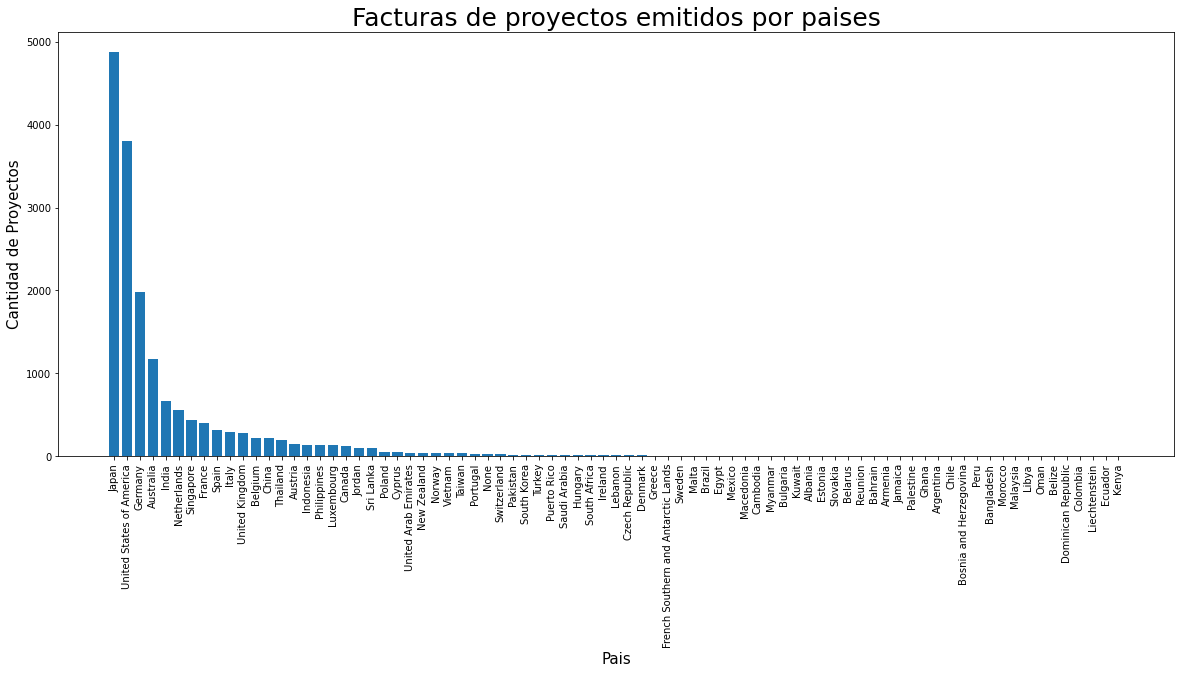

In [51]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
 
# Choose the height of the bars
height = list(coin_country["Billing_Country"])
 
# Choose the names of the bars
bars = list(coin_country["index"])
y_pos = np.arange(len(bars))
 
# Create bars
plt.bar(y_pos, height)
 
# Rotation of the bars names
plt.xticks(y_pos, bars, rotation=90)
 
# Custom the subplot layout
plt.subplots_adjust(bottom=0.4, top=0.99)
plt.xlabel('Pais',fontsize=15)
plt.ylabel('Cantidad de Proyectos',fontsize=15)
plt.title("Facturas de proyectos emitidos por paises",fontsize=25)
 
# Show graphic
plt.show()



### Grafico violin de cantidad de tipos de Stage

In [52]:
pd.set_option('max_rows', None)

group = data.groupby(["Billing_Country"]).agg({'Currency':pd.Series.mode})
group.head()

,Currency
Billing_Country,
Albania,None
Argentina,None
Armenia,None
Australia,None
Austria,None


In [53]:
pd.set_option('max_rows', 20)

In [54]:
#Aplico ln del Amount, excepto a los ceros. Como el Amount abarca un rango alto, el plot no se aprecia
data["Total_Amount"] = data["Total_Amount"].replace([np.inf, -np.inf], np.nan).dropna() 
data["ln Total Amount"]=data["Total_Amount"].apply(lambda x: np.log(x) if x!=0 else x)

Text(0, 0.5, 'ln Total Amount')

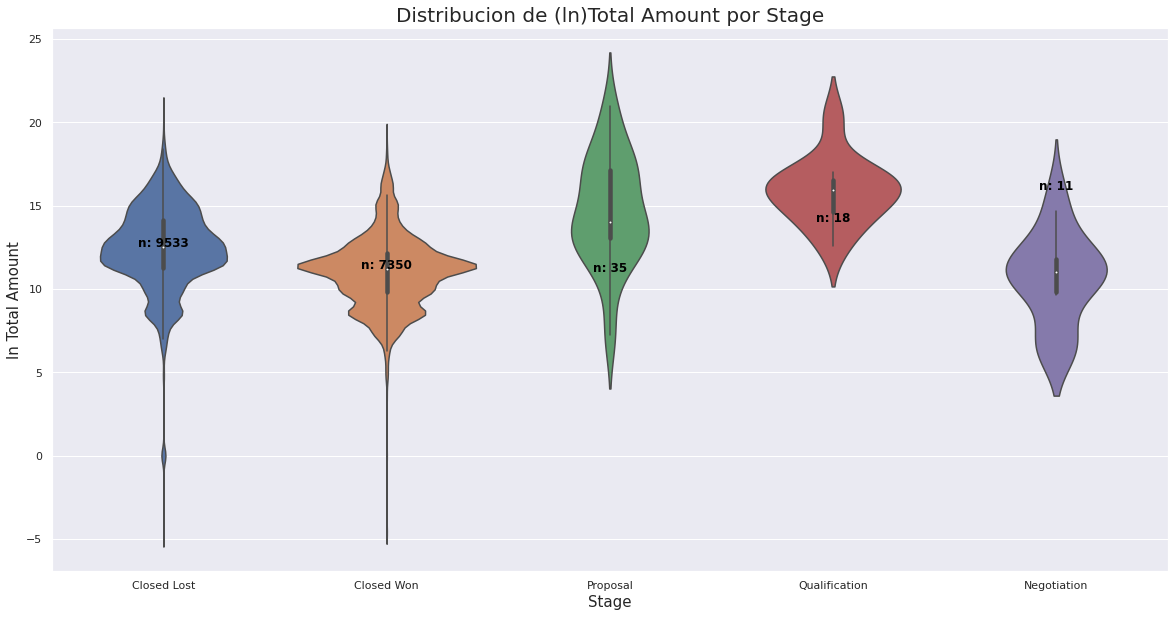

In [55]:
# library & dataset
import seaborn as sns
sns.set(rc={'figure.figsize':(20,10)})

# Just switch x and y
ax = sns.violinplot( x=data["Stage"], y=data["ln Total Amount"] )


# Calculate number of obs per group & median to position labels
medians = data.groupby(['Stage'])['ln Total Amount'].median().values
nobs = data['Stage'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]
 
# Add it to the plot
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
   ax.text(pos[tick], medians[tick] + 0.03, nobs[tick], horizontalalignment='center', color='black', weight='semibold')

#Titles
ax.set_title('Distribucion de (ln)Total Amount por Stage',fontsize=20)
ax.set_xlabel('Stage',fontsize=15)
ax.set_ylabel('ln Total Amount',fontsize=15)
#sns.plt.show()

In [56]:
# Entre los 16k de proyectos, menos de 70 estan en Qualification(18), Proposal(35) y Negotiation(11)

In [61]:
gr=data.groupby(["Stage"]).agg({"Total_Taxable_Amount":["count","mean"]}).reset_index()
gr.columns = ['Stage', 'Total_Taxable_Amount_count', 'Total_Taxable_Amount_mean']
gr

,Stage,Total_Taxable_Amount_count,Total_Taxable_Amount_mean
0,Closed Lost,7350,4.793196e+06
1,Closed Won,9533,1.787157e+06
2,Negotiation,18,7.249430e+05
3,Proposal,35,4.550562e+07
4,Qualification,11,6.967316e+07
